In [1]:
import pandas as pd
path = 'pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima=pd.read_csv(path , index_col = None , names = col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Feature Selection
feature_cols = ['pregnant' , 'insulin' , 'bmi' , 'age']
X=pima[feature_cols]
y = pima['label']

In [4]:
# LETS SPLIT THE ENTIRE DATASET IN TO TWO SPLITS
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test=train_test_split(X , y , random_state = 0)
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train , y_train)
y_pred_class=logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test , y_pred_class))

0.6927083333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
# Every time we do the Classification accuracy , we need to compare with the null accuracy(choosing the highest frequent class as the testing set)
y_test.value_counts()


0    130
1     62
Name: label, dtype: int64

In [7]:
y_test.mean()

0.3229166666666667

In [8]:
1 - y_test.mean() # we use this as our testing accuracy

0.6770833333333333

In [9]:
# Conclusion :- 1) classification accuracy is good and easy to understand
            #   2) but it can not tell us the underlying distribution of the response class
            #   3) and also it does not tell us the type of error our classifier is making (confusion matrix will overcome this)

# Confusion Matrix

In [12]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test , y_pred_class))

[[118  12]
 [ 47  15]]


In [14]:
confusion=metrics.confusion_matrix(y_test , y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
print(confusion)
print(TP , TN , FP , FN)

[[118  12]
 [ 47  15]]
15 118 12 47


# Metircs Computed From Confusion Matrix

In [16]:
# 1) classification metrics:- 
print((TN+TP)/float(TN+TP+FN+FP))
print(metrics.accuracy_score(y_test , y_pred_class))

0.6927083333333334
0.6927083333333334


In [17]:
# 2) Classification Error:-
print((FP+FN)/float(TN+TP+FP+FN))
print(1-metrics.accuracy_score(y_test , y_pred_class))

0.3072916666666667
0.30729166666666663


In [18]:
# 3) Sensitivity:- when our actual value is positive , how often is our classifier predicted correct
# it also called True Positive Rate or recall
# how sensitive is our classifier is positive instances
print((TP/float(TP+FN)))
print(metrics.recall_score(y_test,y_pred_class))

0.24193548387096775
0.24193548387096775


In [19]:
# 4) Specificity:- When our actual value is negative , how often is our classifier predicted correct
# how Specific or selective is our classifier for negative instances
print((TN) / float(TN+FP))

0.9076923076923077


In [20]:
# So our problem is more Specificity than Sensitivity

In [24]:
# 5) False Positive Rate :- This is the reverse of Specificity , when our actual is negative , how often is our classifier predicted incorrect
print((FP) / float(TN+FP))
print(1-(TN/float(TN+FP))) # 1- the Specificity

0.09230769230769231
0.09230769230769231


In [25]:
# 6) Precession:- When a postive value is predited how often the prediction is correct
# how precise is our classifier for positive instances
print(TP/float(FP+TP))
print(metrics.precision_score(y_test , y_pred_class))

0.5555555555555556
0.5555555555555556


# Conclusion for confuson matrix

In [ ]:
# Conclusion:- 
   # 1) Confusion Matrix gives you a more picture of how your classifier is performing
   # 2) Also allows you to compute various classification metrics and these also used to guide for a model selection

# Which Metrics Should We Focus On

In [26]:
# Choice of the metric depends on your business objective For Example :-
# 1) Spam Filter (the Observation is Email) :- Positive(1) for Spam and Negative(0) for a ham 
        # we will optimize for Precession or Specificity because False negative(Spam go to the inbox)are more acceptable than False
        # Positives(Non-Spam is caught by the spam filter), We need to minimize the False Positive by using Specificity and Precession
# 2) Fraudulent Transaction Detector (The Observation is Transaction):- Positive(1) for fraud and negative(0) for a normal transaction
        # Optimize for Sensitivity because Flase Positives (Normal Transaction that are flagged as FRAUD) are more acceptable than false negatives(Fraud Transactions that are not detected)
        # we need to minimize Flase Negative By using Sensitivity Metric

# Adjusing The Classification Threshold

In [30]:
# print the predicted responses
print(logreg.predict(X_test)[0:10])

[0 0 0 0 0 0 0 1 0 1]


In [32]:
# lets check the probabilities
print(logreg.predict_proba(X_test)[0:10 , :]) # 10 rows and all of the column of the response values

[[0.63247571 0.36752429]
 [0.71643656 0.28356344]
 [0.71104114 0.28895886]
 [0.5858938  0.4141062 ]
 [0.84103973 0.15896027]
 [0.82934844 0.17065156]
 [0.50110974 0.49889026]
 [0.48658459 0.51341541]
 [0.72321388 0.27678612]
 [0.32810562 0.67189438]]


In [33]:
# by default the threshold value is 0.5
print(logreg.predict_proba(X_test)[0:10 , 1])

[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438]


In [34]:
y_pred_proba = logreg.predict_proba(X_test)[: , 1]

Text(0, 0.5, 'Frequency')

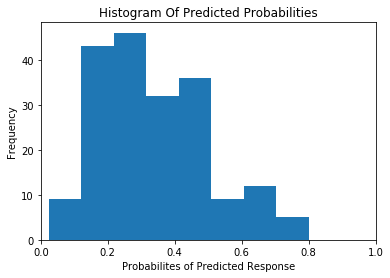

In [37]:
# lets plot using histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_pred_proba , bins = 8)
plt.xlim(0,1)
plt.title('Histogram Of Predicted Probabilities')
plt.xlabel('Probabilites of Predicted Response')
plt.ylabel('Frequency')

In [45]:
# Decrease Threshold To increase Sensitivity and decrease the specificity
from sklearn.preprocessing import binarize
y_pred_class=binarize([y_pred_proba] , 0.3)[0]

In [47]:
print(y_pred_proba[0:10])

[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438]


In [48]:
print(confusion)

[[118  12]
 [ 47  15]]


In [50]:
# print the first ten predicted classes
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [49]:
confusion=metrics.confusion_matrix(y_test , y_pred_class)
print(confusion)

[[80 50]
 [16 46]]


In [51]:
TP=confusion[1,1]
TN=confusion[0,0]
FN=confusion[1,0]
FP=confusion[0,1]
print(TP , TN , FN , FP)

46 80 16 50


In [52]:
# Sensitivity:-# sensitivity has increased (used to be 0.24)
print(TP/float(TP+FN))
print(metrics.recall_score(y_test , y_pred_class))

0.7419354838709677
0.7419354838709677


In [53]:
# Specificity:- # specificity has decreased (used to be 0.91)
print(TN / float(TN+FP))

0.6153846153846154


In [56]:
# Increase the Threshold , To increase the Specificity and the Decrease the Sensitivity
from sklearn.preprocessing import binarize
y_pred_class=binarize([y_pred_proba] , 0.7)[0]
confusion=metrics.confusion_matrix(y_test , y_pred_class)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
print(confusion)
print(TP , TN , FP , FN)


[[129   1]
 [ 58   4]]
4 129 1 58


In [58]:
print(y_pred_class[0:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [61]:
print(y_pred_proba[0:20])

[0.36752429 0.28356344 0.28895886 0.4141062  0.15896027 0.17065156
 0.49889026 0.51341541 0.27678612 0.67189438 0.35755557 0.74087965
 0.36050235 0.23012363 0.42654231 0.19103515 0.45763601 0.1190141
 0.43928953 0.36961151]


In [62]:
# Senstivity:-
print(TP / float(TP+FN))
print(metrics.recall_score(y_test , y_pred_class))

0.06451612903225806
0.06451612903225806


In [64]:
# Specificity:- the specificity with the default threshold is 0.9076923076923077
print(TN/float(TN+FP))

0.9923076923076923


# SO IT DEPENDS ON OUR BUSSINESS OBJECTIBVE

In [65]:
# this is the last METHOD to select the model selection